In [4]:
import os, shutil
from keras.preprocessing import image
import numpy as np

import os
import PIL
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Seeing how many images are in each folder

In [5]:
train_mild_dir = '../../src/data2/train/MildDemented'
train_moderate_dir = '../../src/data2/train/ModerateDemented'
train_nondemented_dir = '../../src/data2/train/NonDemented'
train_verymild_dir = '../../src/data2/train/VeryMildDemented'

val_mild_dir = '../../src/data2/val/MildDemented'
val_moderate_dir = '../../src/data2/val/ModerateDemented'
val_nondemented_dir = '../../src/data2/val/NonDemented'
val_verymild_dir = '../../src/data2/val/VeryMildDemented'

test_mild_dir = '../../src/data2/test/MildDemented'
test_moderate_dir = '../../src/data2/test/ModerateDemented'
test_nondemented_dir = '../../src/data2/test/NonDemented'
test_verymild_dir = '../../src/data2/test/VeryMildDemented'

In [6]:
# see how many pictures are in each directory
print(f' Train Mild: {len(os.listdir(train_mild_dir))}')
print(f' Train Moderate: {len(os.listdir(train_moderate_dir))}')
print(f' Train Normal: {len(os.listdir(train_nondemented_dir))}')
print(f' Train Very Mild: {len(os.listdir(train_verymild_dir))}')

print(f' Val Mild: {len(os.listdir(val_mild_dir))}')
print(f' Val Moderate: {len(os.listdir(val_moderate_dir))}')
print(f' Val Normal: {len(os.listdir(val_nondemented_dir))}')
print(f' Val Very Mild: {len(os.listdir(val_verymild_dir))}')

print(f' Test Mild: {len(os.listdir(test_mild_dir))}')
print(f' Test Moderate: {len(os.listdir(test_moderate_dir))}')  
print(f' Test Normal: {len(os.listdir(test_nondemented_dir))}')
print(f' Test Very Mild: {len(os.listdir(test_verymild_dir))}')  

 Train Mild: 628
 Train Moderate: 45
 Train Normal: 2241
 Train Very Mild: 1569
 Val Mild: 134
 Val Moderate: 9
 Val Normal: 480
 Val Very Mild: 337
 Test Mild: 239
 Test Moderate: 21
 Test Normal: 645
 Test Very Mild: 394


# looking at single image

In [7]:
img_path = '../../src/data/train/NonDemented/nondem100.jpg'


img = image.load_img(img_path)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

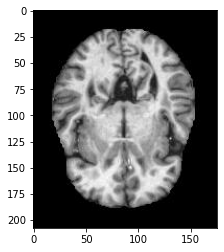

In [8]:
plt.imshow(image.load_img(img_path));

(1, 208, 176, 3)


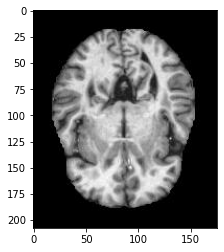

In [9]:
#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [10]:
Image_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '../../src/data2/train',
  seed=123)

Found 4485 files belonging to 4 classes.


In [11]:
class_names = Image_ds.class_names

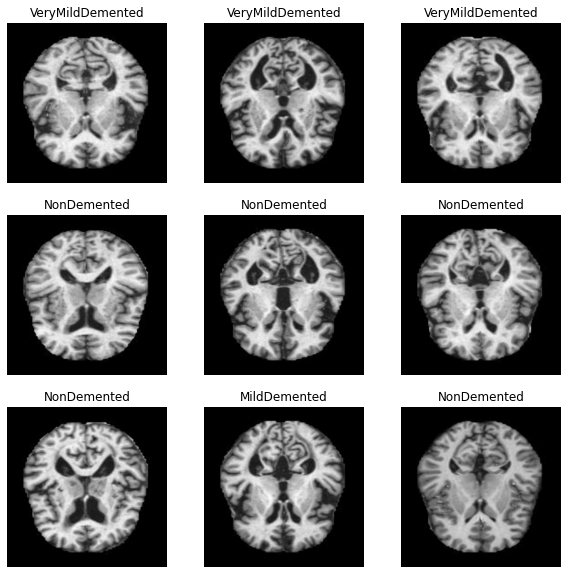

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in Image_ds.take(1):
    for i in range(9):
         ax = plt.subplot(3, 3, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         plt.title(class_names[labels[i]])
         plt.axis("off")
plt.savefig('whammy.png')

In [2]:
image_list = ['NonDemented/nondem100.jpg','VeryMildDemented/verymildDem1.jpg', 'MildDemented/mildDem10.jpg', 'ModerateDemented/moderateDem0.jpg']
class_names = ['Normal', 'Very Mild', 'Mild', 'Moderate']

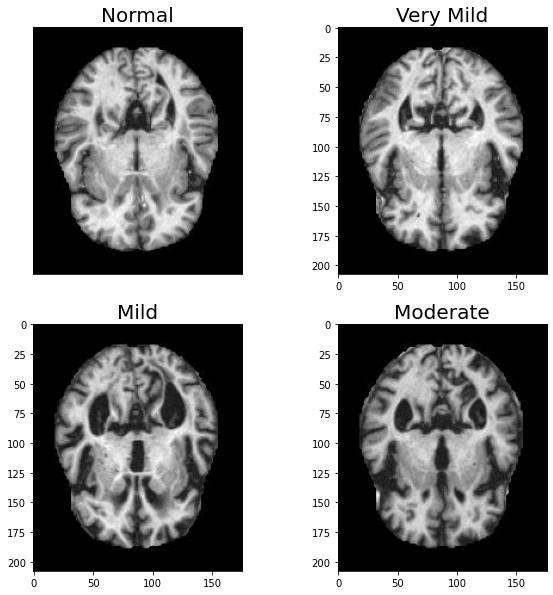

In [3]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))
axs[0,0].imshow(image.load_img('../../src/data2/train/NonDemented/nondem100.jpg'))
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].set_title('Normal', fontsize = 20)
axs[0,1].imshow(image.load_img(f'../../src/data2/train/VeryMildDemented/verymildDem1.jpg'))
axs[0,1].set_title('Very Mild', fontsize = 20)
axs[1,0].imshow(image.load_img('../../src/data2/train/MildDemented/mildDem10.jpg'));
axs[1,0].set_title('Mild', fontsize = 20);
axs[1,1].imshow(image.load_img('../../src/data2/train/ModerateDemented/moderateDem0.jpg'));
axs[1,1].set_title('Moderate', fontsize = 20);

In [4]:
image_list = ['NonDemented/nondem100.jpg','VeryMildDemented/verymildDem1.jpg', 'MildDemented/mildDem10.jpg', 'ModerateDemented/moderateDem0.jpg']
image_names = ['Normal', 'Very Mild', 'Mild', 'Moderate']

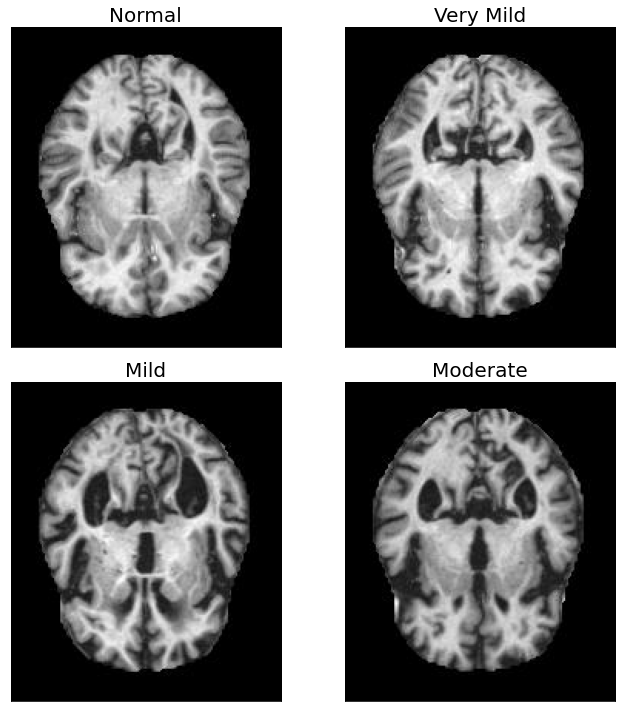

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (10,10))
for i in range(4):
    row = i//2
    column = i%2
    ax = axes[row, column]
    ax.imshow(image.load_img(f'../../src/data2/train/{image_list[i]}'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(image_names[i], fontsize = 20)
plt.tight_layout()
plt.savefig('../report/figures/class_images')